In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fmnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2311 - accuracy: 0.9132
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2249 - accuracy: 0.9164
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2179 - accuracy: 0.9177
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2101 - accuracy: 0.9206
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2044 - accuracy: 0.9234
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1990 - accuracy: 0.9265
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1927 - accuracy: 0.9289
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1873 - accuracy: 0.9291
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1839 - accuracy: 0.9305
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.179

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 89.0291 - accuracy: 0.8570


[89.02910614013672, 0.8569999933242798]

LABEL: 5

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.00392157 0.00392157 0.         0.         0.         0.         0.         0.         0.         0.64313725 0.19607843 0.         0.02745098 0.         0.        ]
 [0.         0.         0.         0.

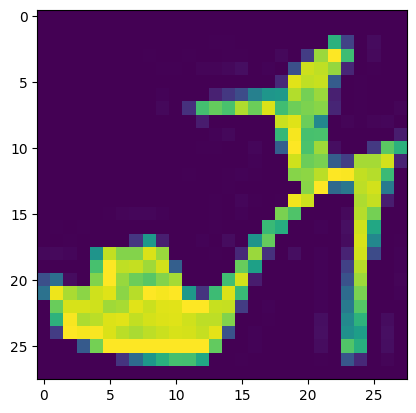

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

index = 9

np.set_printoptions(linewidth=320)

print(f'LABEL: {y_train[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {x_train[index]}')

plt.imshow(x_train[index])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.4):
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.1551 - accuracy: 0.9417
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1551 - accuracy: 0.9417


In [21]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
print(f'\nMODEL TRAINING:')
model.fit(x_train, y_train, epochs=5)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 65s 34ms/step - loss: 0.4845 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3283 - accuracy: 0.8799
Epoch 3/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2796 - accuracy: 0.8972
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2472 - accuracy: 0.9090
Epoch 5/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2232 - accuracy: 0.9173


In [27]:
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(x_test, y_test)


MODEL EVALUATION:
313/313 [==============================] - 3s 9ms/step - loss: 0.2763 - accuracy: 0.8997


In [28]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 22ms/step


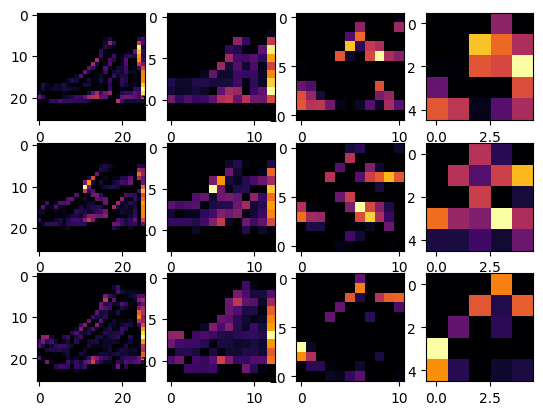

In [29]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)